In [1]:
import pandas as pd

In [31]:
df=pd.read_csv("HR.csv")

In [32]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [33]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [34]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [35]:
from matplotlib import pyplot as plt
%matplotlib inline

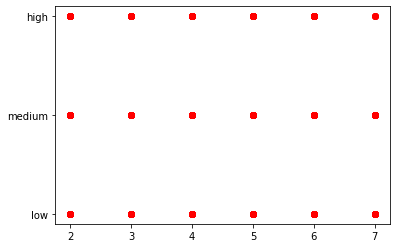

In [36]:
plt.scatter(df[["number_project"]],df.salary,color='red')

In [37]:
salary_dumy=pd.get_dummies(df.salary,prefix='salary')

In [41]:
df=pd.concat([df,salary_dumy],axis='columns')

In [50]:
df=df.drop('salary',axis='columns')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary_high            14999 non-null  uint8  
 10  salary_low             14999 non-null  uint8  
 11  salary_medium          14999 non-null  uint8  
dtypes: float64(2), int64(6), object(1), uint8(3)
memory usage: 1.1+ MB


In [48]:
from sklearn.model_selection import train_test_split

In [95]:
X_train,X_test,Y_train,Y_test=train_test_split(df[['satisfaction_level', 'number_project', 'time_spend_company', 'Work_accident','salary_high', 'salary_low',
       'salary_medium']],df.left,train_size=0.8)

In [96]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [97]:
model.fit(X_train,Y_train)

LogisticRegression()

In [98]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [99]:
model.score(X_test,Y_test)

0.7976666666666666